<a href="https://colab.research.google.com/github/yongzhiqu/IE_4495/blob/master/HW_3_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Problem 1
# You are rewrtie what I have done in class for X = U\sigmaV^*, and X^* = V\sigmaU^*, and prove U is the eigenvector for XX^*
# The same prove is given in textbook as 1.7(a), 1.7(b), 1.8(a), 1.8(b)

In [ ]:
# Problem 2
# Answer is X^* = V\sigmaU^*

In [ ]:
# Problem 3
# True, bacause when you transpose a matrix, you convert the rows to columns and columns to rows, 
# therefore raw correlation becomes column correlation for the transposed matrix
# U represents column correlation for the orginal matrix X, the same U must represent the row corelation for X^T


In [111]:
# Problem 4 

A = np.array([[0,1,1], [np.sqrt(5),2,0], [0,1,1]])
U, S, VT = np.linalg.svd(A,full_matrices=0)
print(S)
# As you can see the S has two non-zero value, the third sigular value is essentially 0 except the float number accuracy.

[3.20545117e+00 1.65078248e+00 2.83524274e-17]


In [ ]:
# Problem 5
# use V*(inverse(\sigma))*U^T*Y as SVD based solution
# use np.linalg.pinv(X)*Y as backlash (pseudo-inverse) solution

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Problem 6

import pandas as pd
import numpy as np
pd_iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IRIS.csv')
data_iris = pd_iris.loc[:,"sepal_length":"petal_width"]
np_iris = data_iris.to_numpy()
print(np_iris.shape)

(150, 4)


In [3]:
iris_mean = np.mean(np_iris, axis=0)
np_iris_centered = np_iris - iris_mean 
U, S, VT = np.linalg.svd(np_iris_centered.transpose(),full_matrices=0)
print(U.shape)

(4, 4)


In [4]:
feature_vector = U[:,0:2]
print(feature_vector.shape)

(4, 2)


In [5]:
reconstructed_data = feature_vector.transpose()@ np_iris_centered.transpose()
print(reconstructed_data.shape)

(2, 150)


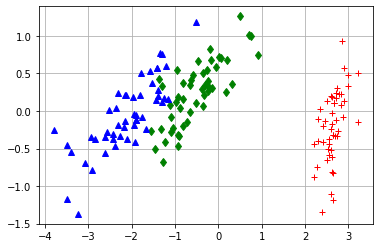

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(reconstructed_data[0,0:50],reconstructed_data[1,0:50], '+', Color='r')
plt.plot(reconstructed_data[0,50:100],reconstructed_data[1,50:100], 'd', Color='g')
plt.plot(reconstructed_data[0,100:150],reconstructed_data[1,100:150], '^', Color='b')
plt.grid()

In [9]:
# Problem 7

import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from matplotlib import pyplot as plt

mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

(1032, 28, 28)
(1, 1032)
(974, 28, 28)


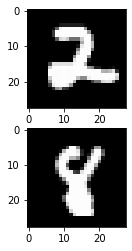

In [32]:
import random 

index2 = np.where(test_labels==2)
all2s = test_images[index2]
print(all2s.shape)
print(np.shape(index))

index8 = np.where(test_labels==8)
all8s = test_images[index8]
print(all8s.shape)

random2 = random.randrange(0,len(all2s)) # choose a random index

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(all2s[random2], cmap='gray')

random8 = random.randrange(0,len(all8s)) # choose a random index for 8
ax2 = fig.add_subplot(2,1,2)
ax2.imshow(all8s[random8], cmap='gray')


In [14]:

all2s_reshape = np.reshape(all2s, [1032, 28*28])
print(all2s_reshape.shape)
all8s_reshape = np.reshape(all8s, [974, 28*28])

all_image = np.concatenate((all2s_reshape, all8s_reshape), axis=0)
# all_image = [all2s_reshape, all8s_reshape]
np.shape(all_image)

(1032, 784)


(2006, 784)

In [96]:
avgNumber = np.mean(all_image,axis=0) # a vector of size 784 by 1
print(avgNumber.shape)
all_image_nomean = all_image - avgNumber # this will work if you understand that 
#avgNumber has the same dimensional as each element of all-image
#however, it is not recommended, use with care. The following is a better practice
all_image_nomean = all_image - np.tile(avgNumber, [2006, 1]) 

all8s_nomean = all8s_reshape - avgNumber
all2s_nomean = all2s_reshape - avgNumber
all_image_nomean.shape



(784,)


(2006, 784)

In [16]:

all_image_nomean_transpose=all_image_nomean.transpose()
print(all_image_nomean_transpose.shape)

all8s_nomean_transpose = all8s_nomean.transpose()
U, S, VT = np.linalg.svd(all_image_nomean_transpose,full_matrices=0)
#U, S, VT = np.linalg.svd(all8s_nomean_transpose,full_matrices=0)

print(np.shape(all_image_nomean_transpose))

print(U.shape)
print(S.shape)
print(VT.shape)

#reconstruct = U @ np.diag(S) @ VT


(784, 2006)
(784, 2006)
(784, 784)
(784,)
(784, 2006)


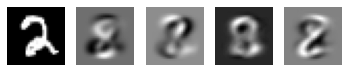

In [45]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(151)
img_avg = ax1.imshow(np.reshape(all_image[100],(28,28)))
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(152)
img_u1 = ax2.imshow(np.reshape(U[:,0],(28,28)))
img_u1.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(153)
img_u1 = ax2.imshow(np.reshape(U[:,1],(28,28)))
img_u1.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(154)
img_u1 = ax2.imshow(np.reshape(U[:,2],(28,28)))
img_u1.set_cmap('gray')
plt.axis('off')

ax5 = fig1.add_subplot(155)
img_u1 = ax5.imshow(np.reshape(U[:,3],(28,28)))
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

In [104]:
mnist_feature_vector = U[:,0:20]
print(mnist_feature_vector.shape)

(784, 20)


(-0.5, 27.5, 27.5, -0.5)

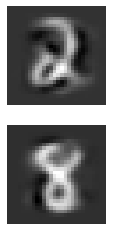

In [105]:
A = mnist_feature_vector
AT = mnist_feature_vector.transpose()
C = all_image_nomean_transpose[:,4]
D = all_image_nomean_transpose[:,1042]

reconstructed2 = avgNumber + A@AT@C
reconstructed8 = avgNumber + A@AT@D

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
img_u1 = ax1.imshow(np.reshape(reconstructed2,(28,28)))
img_u1.set_cmap('gray')
plt.axis('off')

ax1 = fig.add_subplot(2,1,2)
img_u1 = ax1.imshow(np.reshape(reconstructed8,(28,28)))
img_u1.set_cmap('gray')
plt.axis('off')


In [61]:
mnist_2Dfeature_vector = U[:,0:2]
print(mnist_feature_vector.shape)

reduced2 = mnist_2Dfeature_vector.transpose() @ all_image_nomean_transpose[:,0:10]
reduced8 = mnist_2Dfeature_vector.transpose() @ all_image_nomean_transpose[:,1032:1042]
print(reduced2.shape)
print(reduced8.shape)

(784, 20)
(2, 10)
(2, 10)


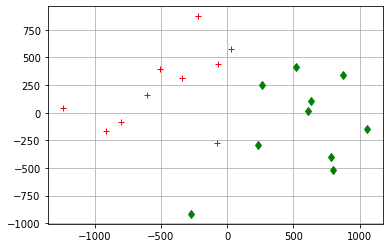

In [63]:
fig = plt.figure()
plt.plot(reduced2[0,:],reduced2[1,:], '+', Color='r')
plt.plot(reduced8[0,:],reduced8[1,:], 'd', Color='g')

plt.grid()

In [65]:
all5s = test_images[np.where(test_labels==5)]
print(all5s.shape)

(892, 28, 28)


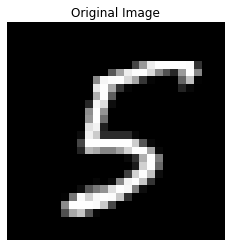

In [77]:
test5 = all5s[2] # third 5 in all5s, you can take anyone

plt.imshow(test5)
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()



In [84]:
print(avgNumber.shape)
test5nomean = test5.reshape(784,1) - avgNumber.reshape(784,1)
print(test5nomean.shape)


(784,)
(784, 1)


In [85]:
r=10
recontruct5 = U[:,:r] @ U[:,:r].T @ test5nomean

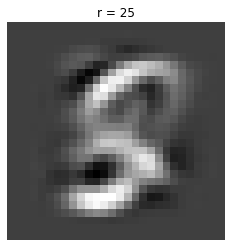

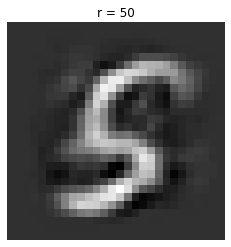

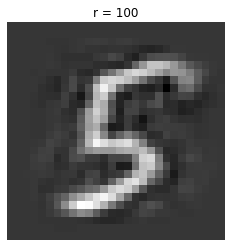

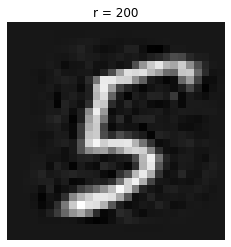

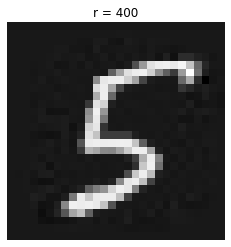

In [106]:
r_list = [25, 50, 100, 200, 400]

for r in r_list:
    recon5 = avgNumber.reshape(784,1) + U[:,:r] @ U[:,:r].T @ test5nomean
    img = plt.imshow(np.reshape(recon5, [28,28]))
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()